In [ ]:
import pandas as pd
import glob
from datetime import datetime
out_dir = "../data" #output directory
# read data from all files
result = pd.concat(
    [pd.read_csv(file, encoding="utf-8", parse_dates=[1,2,5], dayfirst=True) for file in glob.glob(out_dir + "/*.csv")],
    ignore_index=True)

In [26]:
# count number of bets und sum
df = result.groupby(by = ['author', 'status'], as_index=False).agg({'factor':['sum', 'count']})
df.columns = ["_".join(x) for x in df.columns.ravel()]
# make columns with detailed data on W-R-L
df = df.pivot(index='author_', columns='status_', values=['factor_sum', 'factor_count'])
df.columns = ["_".join(x) for x in df.columns.ravel()]
df = df.fillna(value=0)
# add summary columns
df['count'] = df['factor_count_L'] + df['factor_count_R'] + df['factor_count_W']
df['return'] = df['factor_sum_W'] + df['factor_count_R']
df['win'] = df['factor_sum_W'] - df['factor_count_L'] - df['factor_count_W']
df['success_rate'] = df['win'] / df['count'] * 100
df.sort_values(by=['success_rate'], ascending=False)

,factor_sum_L,factor_sum_R,factor_sum_W,factor_count_L,factor_count_R,factor_count_W,count,return,win,success_rate
author_,,,,,,,,,,
emmagadzhieva,7.20,0.00,11.00,3.0,0.0,5.0,8.0,11.00,3.00,37.500000
chaplygin,145.98,24.93,292.37,75.0,13.0,157.0,245.0,305.37,60.37,24.640816
odemwingie,51.22,0.00,22.17,12.0,0.0,6.0,18.0,22.17,4.17,23.166667
netsenko,119.84,0.00,106.93,44.0,0.0,52.0,96.0,106.93,10.93,11.385417
zhukov,506.85,54.70,683.48,254.0,30.0,361.0,645.0,713.48,68.48,10.617054
falcao1984,320.12,67.75,395.34,164.0,38.0,207.0,409.0,433.34,24.34,5.951100
karenadamyan,2.40,0.00,2.08,1.0,0.0,1.0,2.0,2.08,0.08,4.000000
naguchevroman,48.33,4.90,43.63,19.0,2.0,23.0,44.0,45.63,1.63,3.704545
stavkaprognozsport,679.29,62.48,671.08,313.0,32.0,337.0,682.0,703.08,21.08,3.090909


In [ ]:
# analyse newly crawled
result[result['crawled-date'] == datetime(2019, 10, 31, 21, 53)] \
    .groupby(by = ['author', 'date'], as_index=False).count()

result.groupby(by = ['author', 'crawled-date'], as_index=False).count()

result[(result['date'] == datetime.date(2019, 10, 19)) & (result['author'] == 'Arturio') ] 

In [ ]:
#group by time ranges
per = result.date.dt.to_period("M")
df = result.groupby(by=['author', per, 'status']).agg({'factor':['sum', 'count']})
# tune up dataframe
df.columns = ["_".join(x) for x in df.columns.ravel()]
df.reset_index(inplace=True)
# make columns with detailed data on W-R-L
df = df.pivot_table(index=['author', 'date'], columns='status', values=['factor_sum', 'factor_count'])
df.columns = ["_".join(x) for x in df.columns.ravel()]
df = df.fillna(value=0)
# add summary columns
df['count'] = df['factor_count_L'] + df['factor_count_R'] + df['factor_count_W']
df['return'] = df['factor_sum_W'] + df['factor_count_R']
df['win'] = df['factor_sum_W'] - df['factor_count_L'] - df['factor_count_W']
df['success_rate'] = df['win'] / df['count'] * 100
df.reset_index(inplace=True)
df

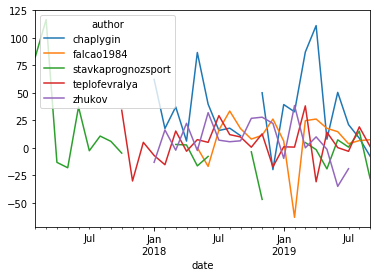

In [143]:
import matplotlib.pyplot as plt
#plot success rate of some best authors
selected_authors = ['chaplygin'
                    #, 'arturio'
                    , 'falcao1984'
                    , 'zhukov'
                    , 'stavkaprognozsport'
                    , 'teplofevralya']
df_plot = df[df.author.isin(selected_authors)] \
    [['author', 'date', 'success_rate']]
df_plot = df_plot.pivot(index='date', columns='author', values='success_rate')
df_plot.plot()